In [58]:
#import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [59]:
data=pd.read_csv('/kaggle/input/google-stock-prediction/GOOG.csv')
data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


Text(0.5, 1.0, 'The price closing values')

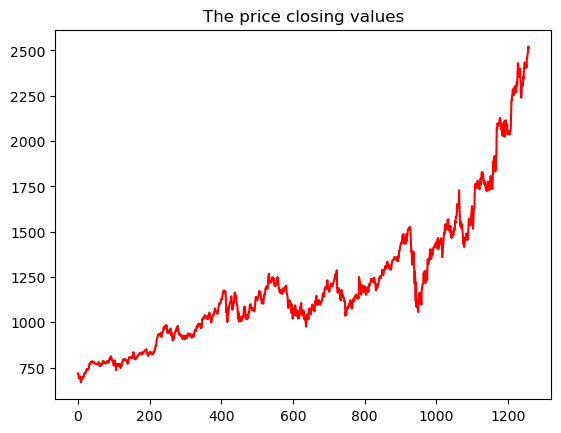

In [60]:
close=data.iloc[:,2:3].values
plt.plot(close,color='red')
plt.title("The price closing values")

In [61]:
# We take the 70 training data 
# and 30% per testing data 
data_training=pd.DataFrame(data['close'][0:int(len(data)*0.7)])
data_testing=pd.DataFrame(data['close'][int(len(data)*0.70): int(len(data))])

In [62]:
#fit the close data into the MinMaxscaler
min_max=MinMaxScaler(feature_range=(0, 1))
train=min_max.fit_transform(data_training)

In [63]:
#divded the data into train and testing
x_train=[]
y_train=[]
for i in range(100,train.shape[0]):
    x_train.append(train[i-100:i])
    y_train.append(train[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [64]:
#RNN model 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [65]:
#Modelbuliding
#Let's create model
regressor=Sequential()
#frist layer
regressor.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))
#Second layer
regressor.add(LSTM(units=100,activation='relu',return_sequences=True))
regressor.add(Dropout(0.2))
#Thried layer
regressor.add(LSTM(units=120,activation='relu',return_sequences=True))
regressor.add(Dropout(0.2))
#Forth layer
regressor.add(LSTM(units=150,activation='relu'))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

In [66]:
#Compile the model
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(x_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
25/25 [==============================] - 26s 788ms/step - loss: 0.1083
Epoch 2/20
25/25 [==============================] - 19s 764ms/step - loss: 0.0201
Epoch 3/20
25/25 [==============================] - 19s 768ms/step - loss: 0.0103
Epoch 4/20
25/25 [==============================] - 20s 781ms/step - loss: 0.0080
Epoch 5/20
25/25 [==============================] - 19s 765ms/step - loss: 0.0071
Epoch 6/20
25/25 [==============================] - 20s 803ms/step - loss: 0.0070
Epoch 7/20
25/25 [==============================] - 20s 793ms/step - loss: 0.0076
Epoch 8/20
25/25 [==============================] - 18s 733ms/step - loss: 0.0072
Epoch 9/20
25/25 [==============================] - 20s 786ms/step - loss: 0.0066
Epoch 10/20
25/25 [==============================] - 19s 760ms/step - loss: 0.0065
Epoch 11/20
25/25 [==============================] - 20s 791ms/step - loss: 0.0062
Epoch 12/20
25/25 [==============================] - 19s 762ms/step - loss: 0.0056
Epoch 13/20
2

In [67]:
past_100=data_training.tail()
final_df=past_100.append(data_testing,ignore_index=True)
final_df.head()


,close
0,1320.54
1,1328.13
2,1340.62
3,1343.56
4,1344.66


In [68]:
test_data=min_max.fit_transform(final_df)
test_data.shape

(383, 1)

In [69]:
x_test=[]
y_test=[]
for i in range(100,test_data.shape[0]):
    x_test.append(test_data[i-100:i])
    y_test.append(test_data[i,0])
x_test,y_test=np.array(x_test),np.array(y_test)
#Prediction of the test data set
y_pred=regressor.predict(x_test)

9/9 [==============================] - 1s 59ms/step


In [70]:
y_prediction=min_max.inverse_transform(y_pred)

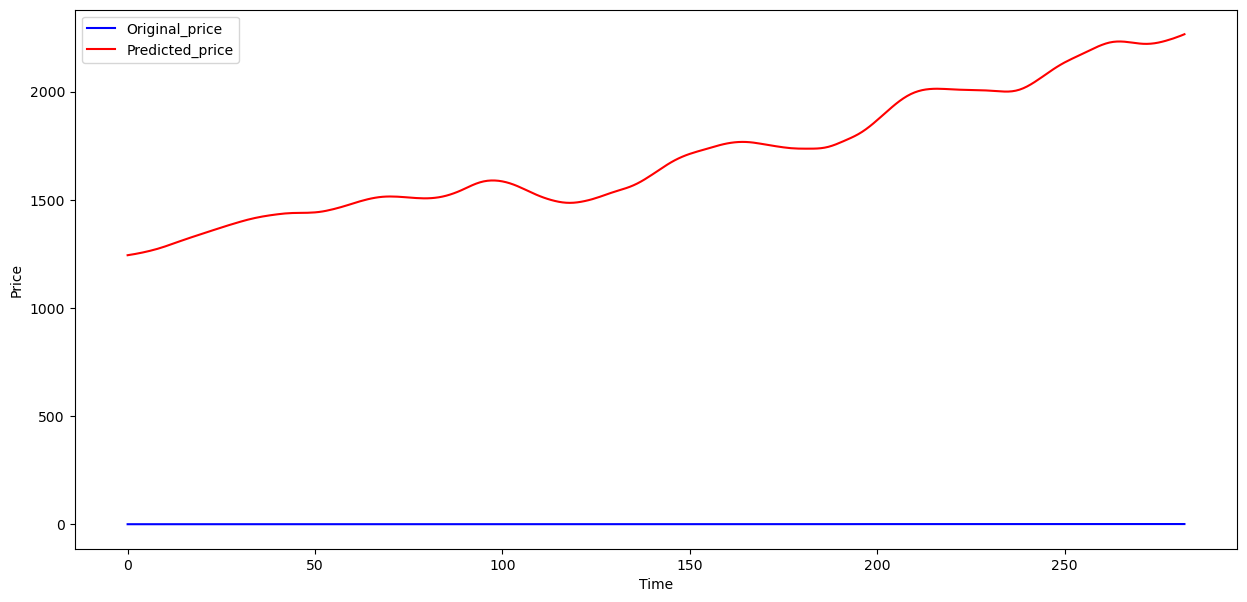

In [71]:
plt.figure(figsize=(15,7))
plt.plot(y_test,'blue',label="Original_price")
plt.plot(y_prediction,'red',label="Predicted_price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()